# LOSS AND ERROR RATE -- DEMO

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from random import randint
import utils

### Download the data and print the sizes

In [2]:
train_data=torch.load('../../data/mnist/train_data.pt')
train_label=torch.load('../../data/mnist/train_label.pt')
test_data=torch.load('../../data/mnist/test_data.pt')
test_label=torch.load('../../data/mnist/test_label.pt')

### Make a ONE layer net class. 

In [3]:
class one_layer_net(nn.Module):

    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear_layer = nn.Linear( input_size, output_size , bias=False)
        
    def forward(self, x):
        scores = self.linear_layer(x)
        return scores

### Build the net

In [4]:
net=one_layer_net(784,10)
print(net)

one_layer_net(
  (linear_layer): Linear(in_features=784, out_features=10, bias=False)
)


### Choose the criterion, optimizer, batchsize, learning rate

In [5]:
criterion = nn.CrossEntropyLoss()

optimizer=torch.optim.SGD( net.parameters() , lr=0.01 )

bs=200

### Do 30 passes through the training set

In [6]:
for epoch in range(30):
    
    running_loss=0
    running_error=0
    num_batches=0
    
    shuffled_indices=torch.randperm(60000)
 
    for count in range(0,60000,bs):
    
        optimizer.zero_grad()
        
        indices=shuffled_indices[count:count+bs]
        minibatch_data =  train_data[indices]
        minibatch_label= train_label[indices]

        inputs = minibatch_data.view(bs,784)

        inputs.requires_grad_()

        scores=net( inputs ) 

        loss =  criterion( scores , minibatch_label) 
        
        loss.backward()

        optimizer.step()
        
        # compute and accumulate stats
        
        num_batches+=1
        
        with torch.no_grad():
            
            running_loss += loss.item()

            error = utils.get_error( scores , minibatch_label)
            running_error += error.item()  
            
    
    
    # compute stats for the full training set
    total_loss = running_loss/num_batches
    total_error = running_error/num_batches
    
    print('epoch=',epoch, '\t loss=', total_loss , '\t error=', total_error*100 ,'percent')
        
    
        
        

epoch= 0 	 loss= 1.4542371573050816 	 error= 28.018333375453945 percent
epoch= 1 	 loss= 0.8545827406644821 	 error= 16.791666607062023 percent
epoch= 2 	 loss= 0.6874599287907283 	 error= 14.948333164056143 percent
epoch= 3 	 loss= 0.6062618652979533 	 error= 14.074999849001566 percent
epoch= 4 	 loss= 0.556918087999026 	 error= 13.406666417916616 percent
epoch= 5 	 loss= 0.5231823103626569 	 error= 12.918333411216738 percent
epoch= 6 	 loss= 0.49833456695079803 	 error= 12.530000150203705 percent
epoch= 7 	 loss= 0.4790853892763456 	 error= 12.188333451747894 percent
epoch= 8 	 loss= 0.463634729385376 	 error= 11.971666872501373 percent
epoch= 9 	 loss= 0.45096359074115755 	 error= 11.748333533604939 percent
epoch= 10 	 loss= 0.4401935163140297 	 error= 11.538333674271902 percent
epoch= 11 	 loss= 0.43100089609622955 	 error= 11.383333702882132 percent
epoch= 12 	 loss= 0.42300429940223694 	 error= 11.24833369255066 percent
epoch= 13 	 loss= 0.4159654794136683 	 error= 11.12833382685

### Now that the network is trained and do 10% of error on the training set, we are going to see how well it is doing on the test set...

In [7]:
running_error=0
num_batches=0

with torch.no_grad():

    for i in range(0,10000,bs):

        # extract the minibatch
        minibatch_data =  test_data[i:i+bs]
        minibatch_label= test_label[i:i+bs]

        # reshape the minibatch
        inputs = minibatch_data.view(bs,784)

        # feed it to the network
        scores=net( inputs ) 

        # compute the error made on this batch
        error = utils.get_error( scores , minibatch_label)

        # add it to the running error
        running_error += error.item()

        num_batches+=1


    
# compute error rate on the full test set
total_error = running_error/num_batches

print( 'error rate on test set =', total_error*100 ,'percent')

      

error rate on test set = 9.290000200271606 percent


### Choose image at random from the test set and see how good/bad are the predictions

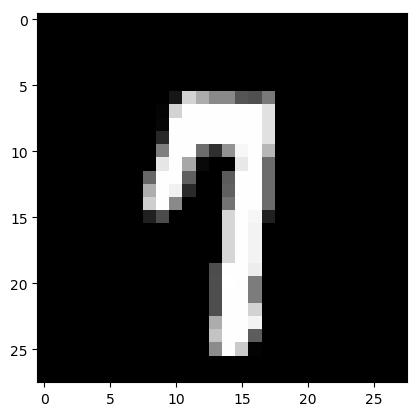

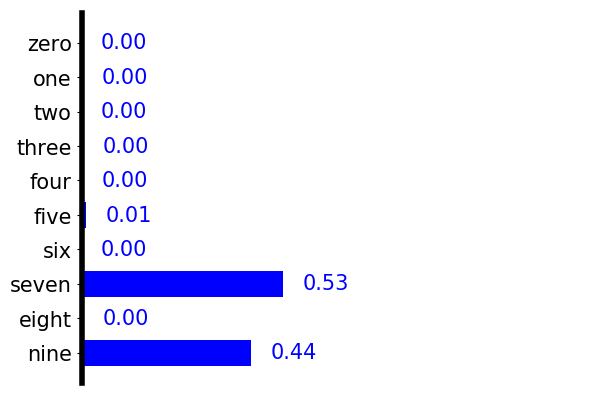

In [15]:
# choose a picture at random
idx=randint(0, 10000-1)
im=test_data[idx]

# diplay the picture
utils.show(im)

# feed it to the net and display the confidence scores
scores =  net( im.view(1,784)) 
probs= F.softmax(scores, dim=1)
utils.show_prob_mnist(probs)